In [1]:
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import json

import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

from pathlib import Path
from typing import List, Dict, Tuple, Union, Callable, Optional, Any

In [51]:
surrogate_analysis_folder = "../analysis/surrogates/30_runs"
raw_mo_analysis_folder = "../analysis/raw_mo/30_runs"
seed_list = list(range(10,310,10))

In [52]:
def gather_surrogate_results(surrogate_analysis_folder: str, seed_list: List[int]) -> Dict[int, Dict[int, Dict[int, Dict[str, Any]]]]:
    """
    Gathers the results of the surrogate analysis.
    """
    size_seed_results = defaultdict(lambda: defaultdict(dict))
    for data_size in os.listdir(surrogate_analysis_folder):
        size_folder = os.path.join(surrogate_analysis_folder, data_size)
        for seed in os.listdir(size_folder): 
            seed_folder = os.path.join(size_folder, str(seed))
            with open(os.path.join(seed_folder, "pareto_metrics.json"), "r") as f:
                results = json.load(f)
            size_seed_results[int(data_size)][seed] = results
            
    return size_seed_results
    

In [53]:
def gather_raw_mo_results(raw_mo_analysis_folder: str, seed_list: List[int]) -> Dict[int, Dict[int, Dict[int, Dict[str, Any]]]]:
    """
    Gathers the results of the raw_mo analysis.
    """
    seed_results = defaultdict(lambda: defaultdict(dict))

    for seed in seed_list: 
        seed_folder = os.path.join(raw_mo_analysis_folder, str(seed))
        with open(os.path.join(seed_folder, "pareto_metrics.json"), "r") as f:
            results = json.load(f)
        
        seed_results[seed] = results
                
    return seed_results


In [75]:
raw_mo_results = gather_surrogate_results(raw_mo_analysis_folder, seed_list)


In [76]:
surr_mo_results = gather_surrogate_results(surrogate_analysis_folder, seed_list)

In [77]:
raw_mo_results.keys()

dict_keys([4000, 3000, 2000, 3500, 2500])

In [78]:
surr_mo_results.keys()

dict_keys([500, 1000, 0, 1500])

In [79]:
raw_archs = 2000    
surr_archs = 0

In [80]:
def make_boxplot(data1: List, data2: List, data1_label: str, data2_label: str, xlabel: str, ylabel: str, title: str) -> None:
    
    plt.boxplot([data1, data2], labels=[data1_label, data2_label])
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.title(title)
    
    plt.show()

In [81]:
surr_best_train_times = [surr_mo_results[surr_archs][seed]["best_train_time"] for seed in surr_mo_results[surr_archs]]
raw_best_train_times = [raw_mo_results[raw_archs][seed]["best_train_time"] for seed in raw_mo_results[raw_archs]]

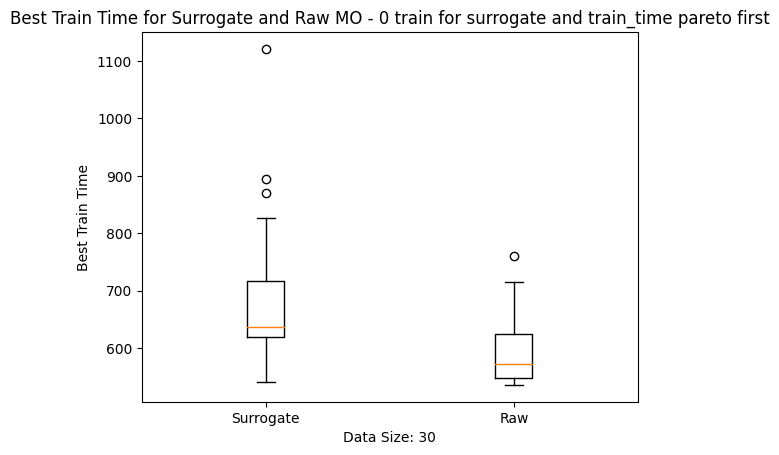

In [82]:
make_boxplot(surr_best_train_times, raw_best_train_times, "Surrogate", "Raw", "Data Size: 30", "Best Train Time", "Best Train Time for Surrogate and Raw MO - 0 train for surrogate and train_time pareto first")

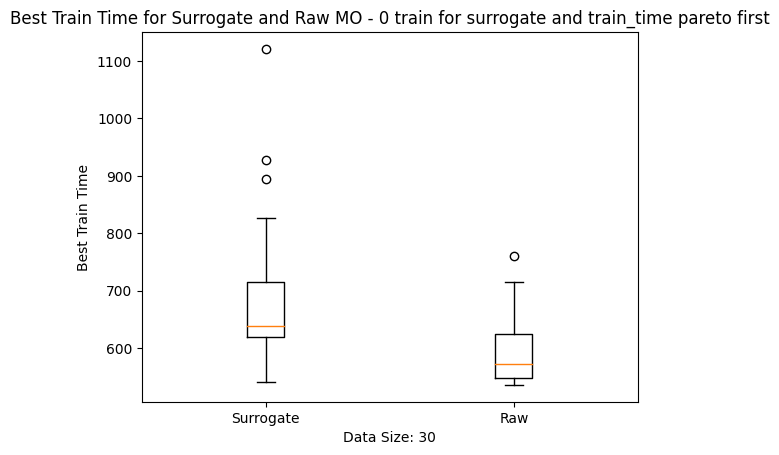

In [70]:
make_boxplot(surr_best_train_times, raw_best_train_times, "Surrogate", "Raw", "Data Size: 30", "Best Train Time", "Best Train Time for Surrogate and Raw MO - 0 train for surrogate and train_time pareto first")

In [83]:
surr_hypervolumes = [surr_mo_results[surr_archs][seed]["hypervolume"] for seed in surr_mo_results[surr_archs]]
raw_hypervolumes = [raw_mo_results[raw_archs][seed]["hypervolume"] for seed in raw_mo_results[raw_archs]]

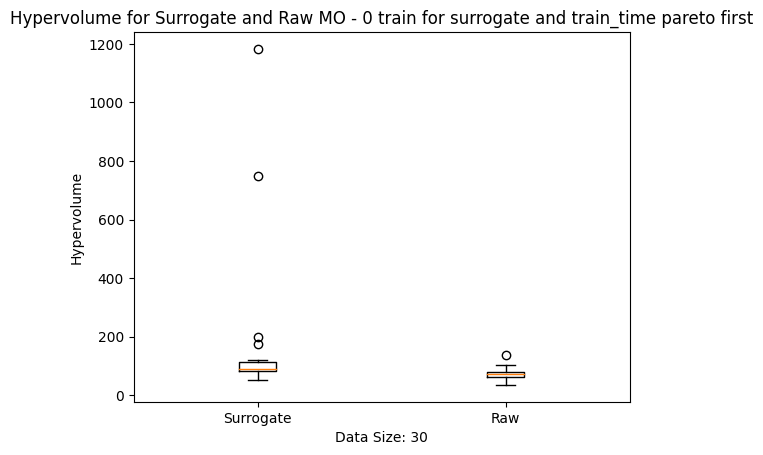

In [84]:
make_boxplot(surr_hypervolumes, raw_hypervolumes, "Surrogate", "Raw", "Data Size: 30", "Hypervolume", "Hypervolume for Surrogate and Raw MO - 0 train for surrogate and train_time pareto first")

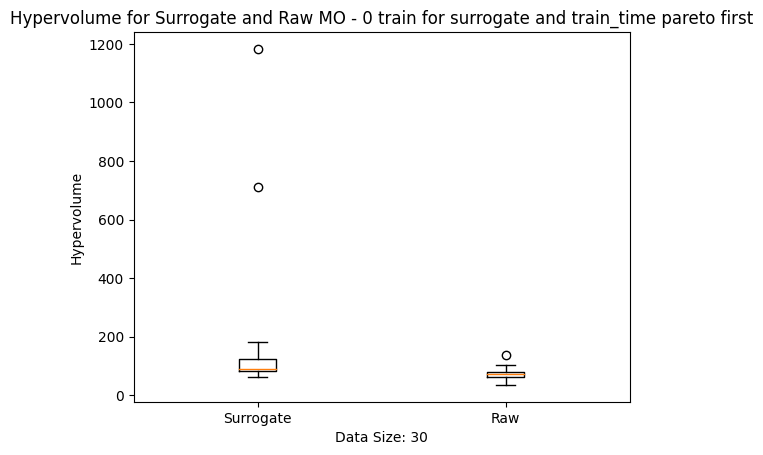

In [73]:
make_boxplot(surr_hypervolumes, raw_hypervolumes, "Surrogate", "Raw", "Data Size: 30", "Hypervolume", "Hypervolume for Surrogate and Raw MO - 0 train for surrogate and train_time pareto first")

In [64]:
surr_best_accs = [surr_mo_results[surr_archs][seed]["best_acc"] for seed in surr_mo_results[surr_archs]]
raw_best_accs = [raw_mo_results[raw_archs][seed]["best_acc"] for seed in raw_mo_results[raw_archs]]

In [85]:
surr_best_accs = [surr_mo_results[surr_archs][seed]["best_acc"] for seed in surr_mo_results[surr_archs]]
raw_best_accs = [raw_mo_results[raw_archs][seed]["best_acc"] for seed in raw_mo_results[raw_archs]]

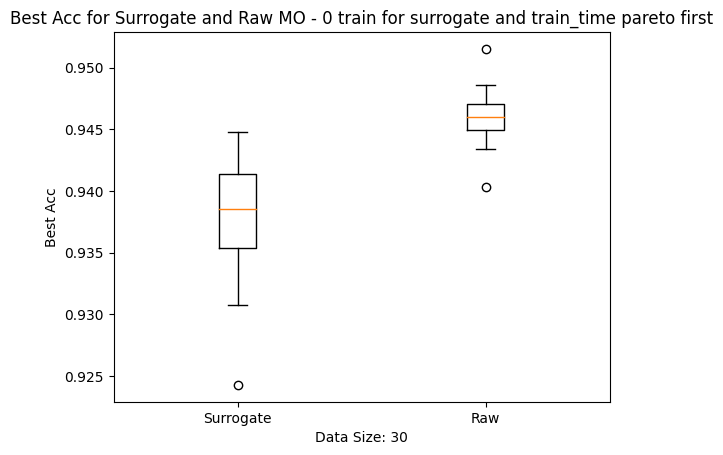

In [86]:
make_boxplot(surr_best_accs, raw_best_accs, "Surrogate", "Raw", "Data Size: 30", "Best Acc", "Best Acc for Surrogate and Raw MO - 0 train for surrogate and train_time pareto first")

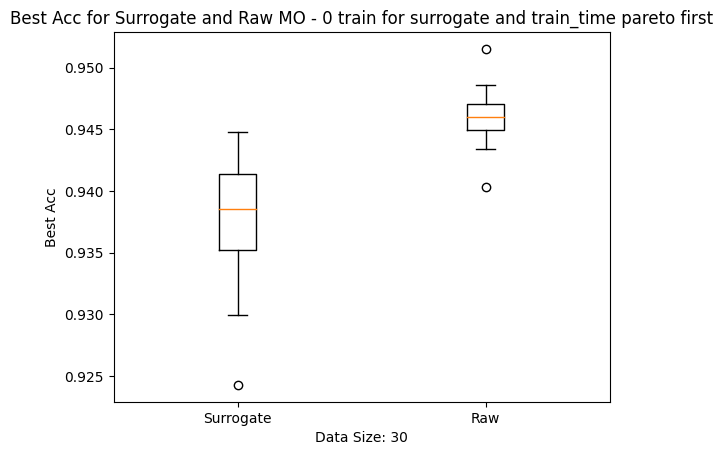

In [74]:
make_boxplot(surr_best_accs, raw_best_accs, "Surrogate", "Raw", "Data Size: 30", "Best Acc", "Best Acc for Surrogate and Raw MO - 0 train for surrogate and train_time pareto first")

In [66]:
surr_avg_accs = [surr_mo_results[surr_archs][seed]["avg_acc"] for seed in surr_mo_results[surr_archs]]
raw_avg_accs = [raw_mo_results[raw_archs][seed]["avg_acc"] for seed in raw_mo_results[raw_archs]]

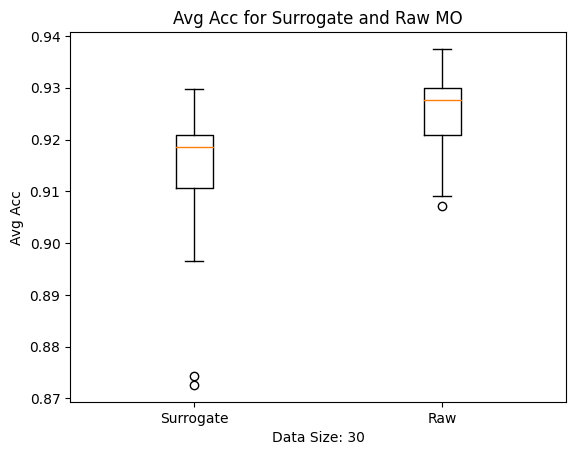

In [67]:
make_boxplot(surr_avg_accs, raw_avg_accs, "Surrogate", "Raw", "Data Size: 30", "Avg Acc", "Avg Acc for Surrogate and Raw MO")

In [68]:
surr_avg_train_time = [surr_mo_results[surr_archs][seed]["avg_train_time"] for seed in surr_mo_results[surr_archs]]
raw_avg_train_time = [raw_mo_results[raw_archs][seed]["avg_train_time"] for seed in raw_mo_results[raw_archs]]

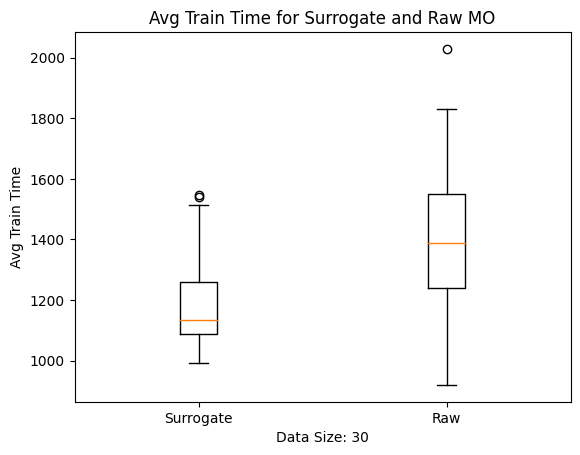

In [69]:
make_boxplot(surr_avg_train_time, raw_avg_train_time, "Surrogate", "Raw", "Data Size: 30", "Avg Train Time", "Avg Train Time for Surrogate and Raw MO")